## Basic Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_palette("pastel")

In [6]:
warnings.filterwarnings('ignore')

## Data

In [7]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')

In [8]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [9]:
data.info()
# No need for Datatypes Conversion
# Need to remove the Customer Name as it is an extension of the Customer ID
# No Null values indicating there is no need to use the Null Values Replacement Step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [10]:
data.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

## EDA

In [11]:
# This shows that the Data is balanced and there is no Imbalanced Class
data.groupby('Churn').CustomerID.nunique()

Churn
0    50221
1    49779
Name: CustomerID, dtype: int64

In [12]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [13]:
for i in data.columns:
    try:
        print(i,data[i].mean() - 3*data[i].std(),data[i].mean() + 3*data[i].std())
    except:
        pass
    

CustomerID -36602.47339006323 136603.4733900632
Age -1.813828629910681 89.86786862991067
Subscription_Length_Months -8.289282948912183 33.269482948912184
Monthly_Bill 4.361109242896546 125.74528435710347
Total_Usage_GB -116.99553794731838 665.7828379473183
Churn -1.0022028476127323 1.9977828476127322


In [14]:
# Getting the Range of Numerical Columns so as to visualize in terms of frequency. This is also helpful in identifying the type of scaling method to use
print("Age Range : ",data['Age'].min(),data['Age'].max())
print("Subscription Length Range : ",data['Subscription_Length_Months'].min(),data['Subscription_Length_Months'].max())
print("Bill Range : ",data['Monthly_Bill'].min(),data['Monthly_Bill'].max())
print("Total Usage Range : ",data['Total_Usage_GB'].min(),data['Total_Usage_GB'].max())

# Here it shows that the min and the max lie between the 3std dev bands indicating that there are no outliers in the Data

Age Range :  18 70
Subscription Length Range :  1 24
Bill Range :  30.0 100.0
Total Usage Range :  50 500


<Axes: xlabel='Total_Usage_GB', ylabel='Count'>

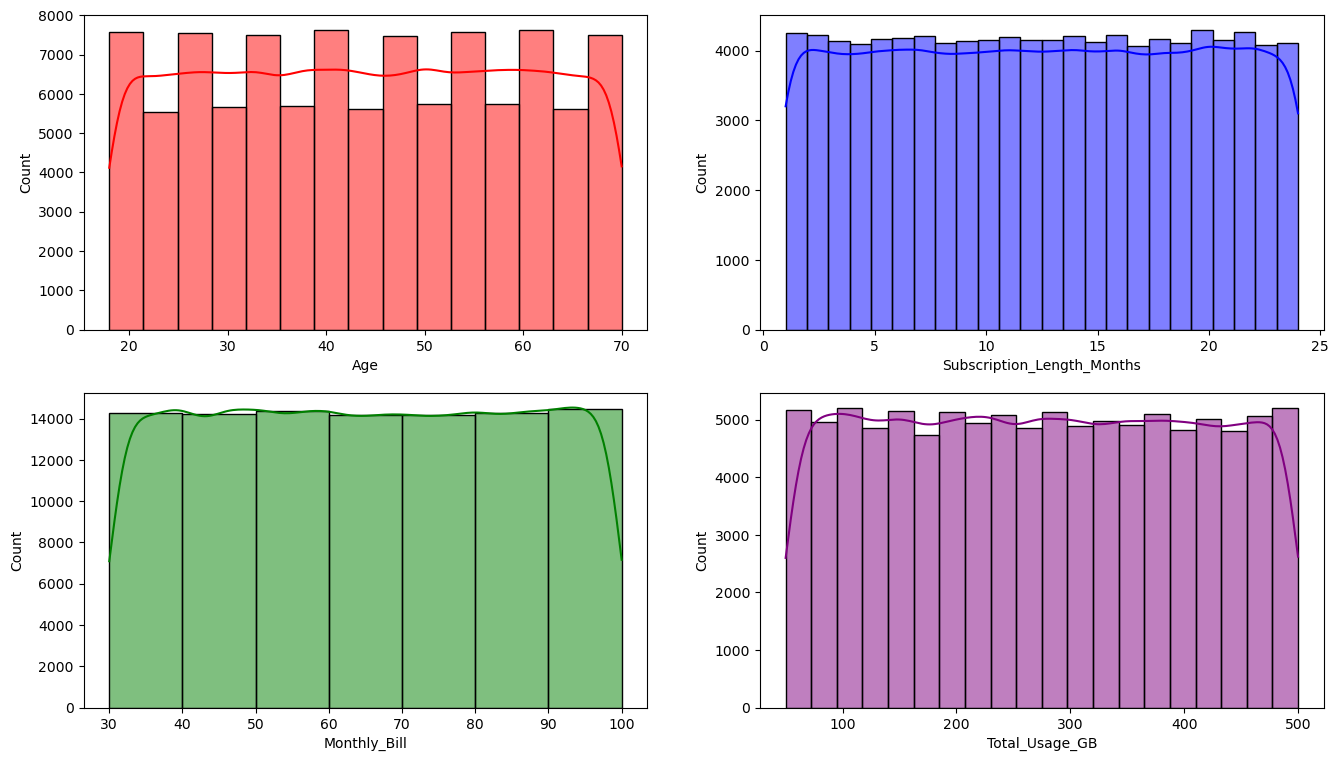

In [15]:
fig, ax = plt.subplots(2,2,figsize=(16,9))

sns.histplot(data['Age'],bins=15,kde=True,ax=ax[0,0],color='red')
sns.histplot(data['Subscription_Length_Months'],bins=24,kde=True,ax=ax[0,1],color='blue')
sns.histplot(data['Monthly_Bill'],bins=7,kde=True,ax=ax[1,0],color='green')
sns.histplot(data['Total_Usage_GB'],bins=20,kde=True,ax=ax[1,1],color='purple')

<Axes: xlabel='Location', ylabel='count'>

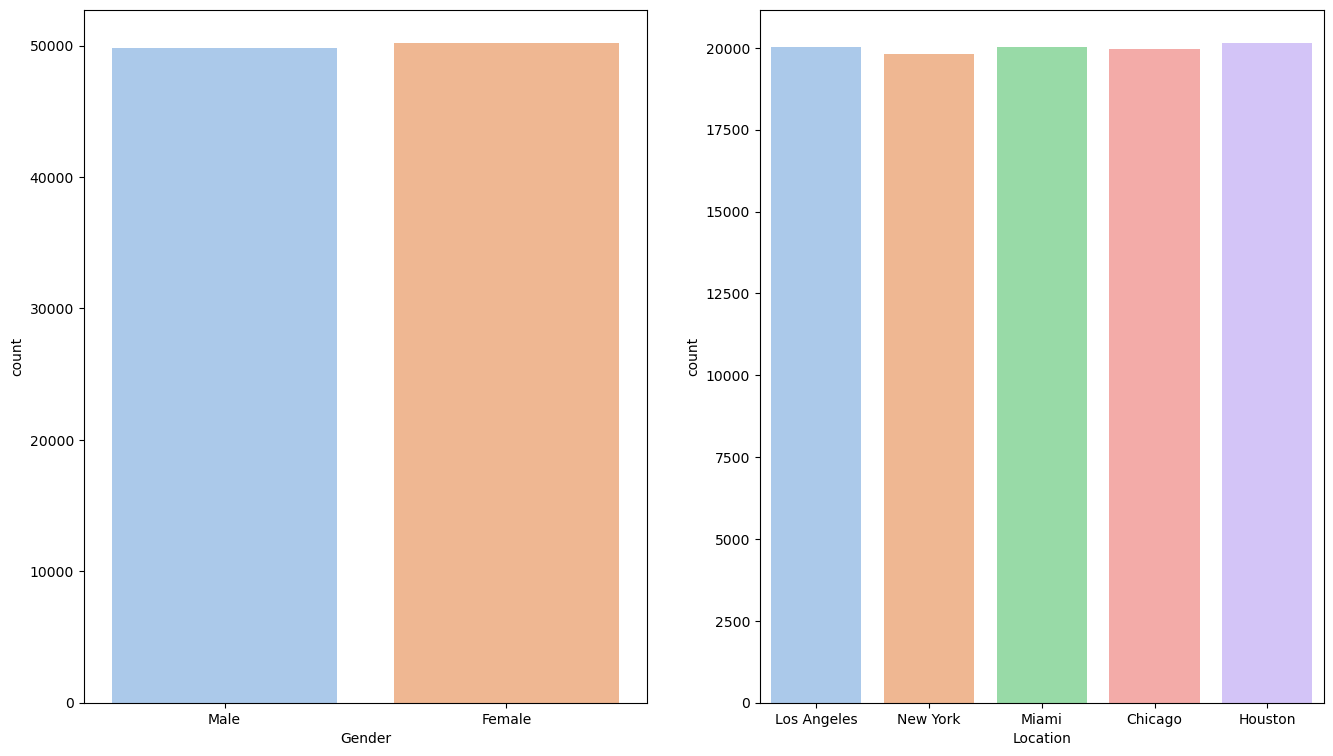

In [16]:
fig,ax = plt.subplots(1,2,figsize=(16,9))
sns.countplot(x='Gender',data=data,ax=ax[0])
sns.countplot(x='Location',data=data,ax=ax[1])

<Axes: >

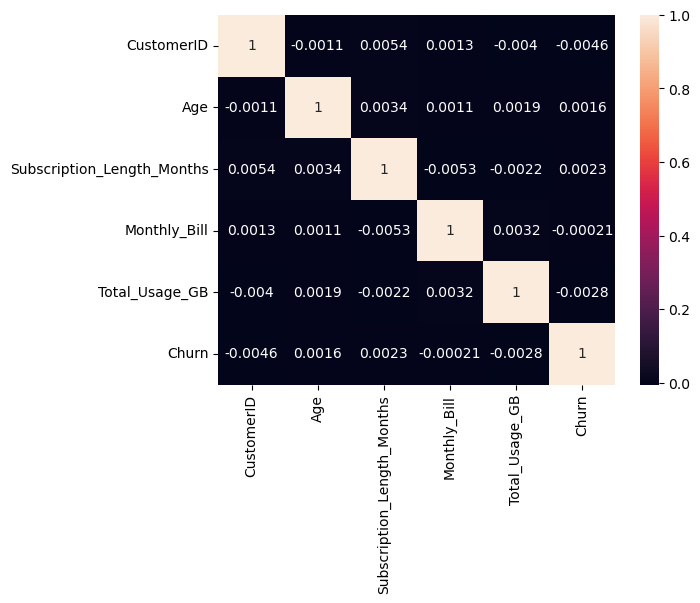

In [17]:
sns.heatmap(data.corr(),annot=True)

## Data Preprocessing 1
Removing Unnecessary values

In [18]:
data2 = data.copy()

In [19]:
data2.drop('Name',axis=1,inplace=True)
data2.drop('CustomerID',axis=1,inplace=True)

In [20]:
data2.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


## Data Preprocessing 2
Preprocessing values

### Encoding

In [21]:
loc = pd.get_dummies(data2['Location'],drop_first=False)
data2 = pd.concat([data2,loc],axis=1)

In [22]:
gender = pd.get_dummies(data2['Gender'],drop_first=False)
data2 = pd.concat([data2,gender],axis=1)

In [23]:
data2.drop(columns=['Gender','Location'],inplace=True)

In [24]:
data2.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York,Female,Male
0,63,17,73.36,236,0,0,0,1,0,0,0,1
1,62,1,48.76,172,0,0,0,0,0,1,1,0
2,24,5,85.47,460,0,0,0,1,0,0,1,0
3,36,3,97.94,297,1,0,0,0,1,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0,1,0


### Scaling

In [25]:
data3 = data2.copy()

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [27]:
data3['Age'] = scaler.fit_transform(np.asarray(data3['Age']).reshape(-1,1))

In [28]:
data3['Subscription_Length_Months'] = scaler.fit_transform(np.asarray(data3['Subscription_Length_Months']).reshape(-1,1))

In [29]:
data3['Monthly_Bill'] = scaler.fit_transform(np.asarray(data3['Monthly_Bill']).reshape(-1,1))

In [30]:
data3['Total_Usage_GB'] = scaler.fit_transform(np.asarray(data3['Total_Usage_GB']).reshape(-1,1))

In [31]:
data3.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York,Female,Male
0,0.730769,0.384615,0.237892,-0.168142,0,0,0,1,0,0,0,1
1,0.692308,-0.846154,-0.462963,-0.451327,0,0,0,0,0,1,1,0
2,-0.769231,-0.538462,0.582906,0.823009,0,0,0,1,0,0,1,0
3,-0.307692,-0.692308,0.938177,0.101770,1,0,0,0,1,0,1,0
4,0.076923,0.538462,-0.195726,-0.035398,0,0,0,0,1,0,1,0


## Model

### Splitting Train and Test Data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [33]:
data3.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York',
       'Female', 'Male'],
      dtype='object')

In [34]:
X = data3[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Chicago','Houston','Los Angeles','Miami','New York','Female','Male']]
Y = data3['Churn']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=43)

In [36]:
rfc = RandomForestClassifier(n_estimators=300,max_depth=4)

In [37]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4, n_estimators=300)

In [38]:
Y_pred = rfc.predict(X_test)

### Metrics

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
confusion_matrix(Y_test,Y_pred)

array([[9641, 5489],
       [9399, 5471]], dtype=int64)

In [41]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.64      0.56     15130
           1       0.50      0.37      0.42     14870

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



In [42]:
def metrics_map(test, pred, model):
    from sklearn.metrics import accuracy_score ,f1_score ,roc_curve ,auc
    
    fig, ax = plt.subplots(1,3,figsize=(18, 5))
    
    sns.heatmap(confusion_matrix(test, pred), annot=True, cmap='crest', fmt=".0f", ax=ax[0])
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('Actual Values')
    ax[0].set_ylabel('Predicted Values')
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(test, pred)

    sns.lineplot(x=fpr, y=tpr, ax=ax[1])
    ax[1].set_title('ROC Curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

    # Calculate the confusion matrix
    cm = confusion_matrix(test,pred)
    
    # Calculate sensitivity and specificity
    accuracy    = np.sum(cm[0, 0] + cm[1, 1]) / np.sum(cm)
    precision   = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall      = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    f1score     = f1_score(test, pred, average="weighted")
    auc_score   = auc(fpr, tpr)
    
    Metrics = {'Metrics':['Accuracy', 'Precision', 'Recall','Specificity', 'F1 Score', 'AUC Score'],
               'Score'  :[accuracy, precision, recall, specificity, f1score, auc_score]}
    
    df = pd.DataFrame(Metrics)
    df.plot(kind='bar',x='Metrics',y='Score',ax=ax[2],color='r')
    ax[2].set_title('Metrics')
    bar_container = ax[2].bar(Metrics['Metrics'],Metrics['Score'],color='r')
    ax[2].bar_label(bar_container,fmt=lambda x:'{:.2f}'.format(x))
    ax[2].set_xlabel('Metrics')
    ax[2].set_ylabel('Values')
    
    #return df

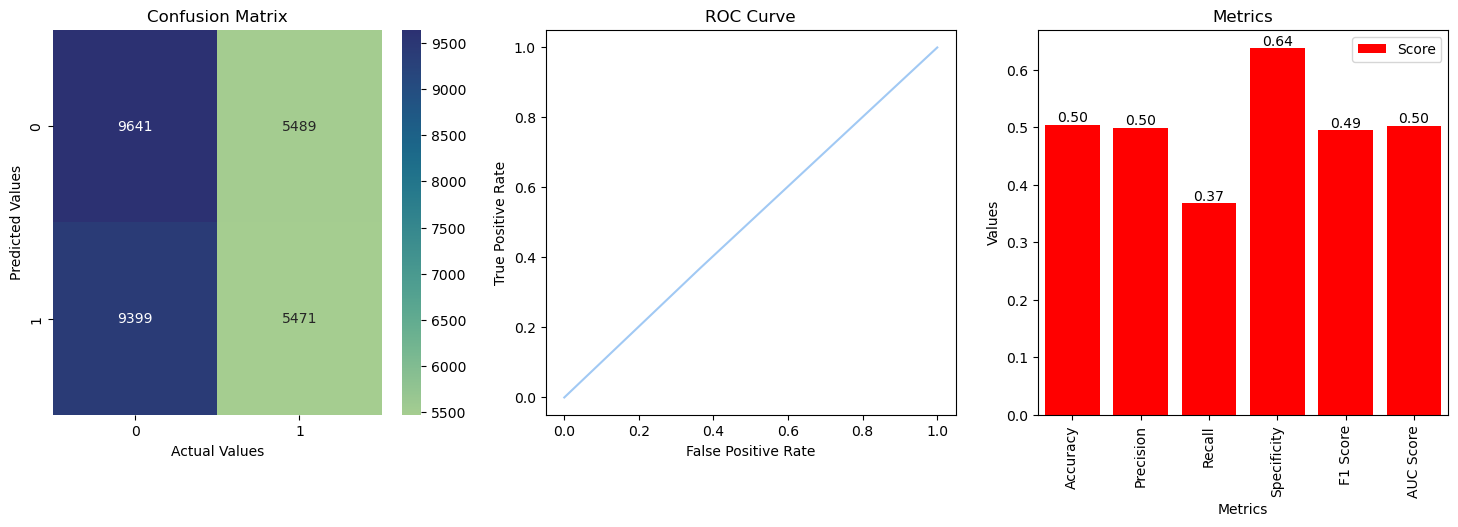

In [43]:
metrics_map(Y_test,Y_pred,'RFC')

In [44]:
# Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB, 'Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York','Female', 'Male'

rfc.predict(np.array([31,12,68,270,1,0,0,0,0,0,1]).reshape(1,11))

array([0], dtype=int64)

### Fine Tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [46]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5,6],
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, preds)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 3, 'n_estimators': 100}
Test Accuracy: 0.5007666666666667


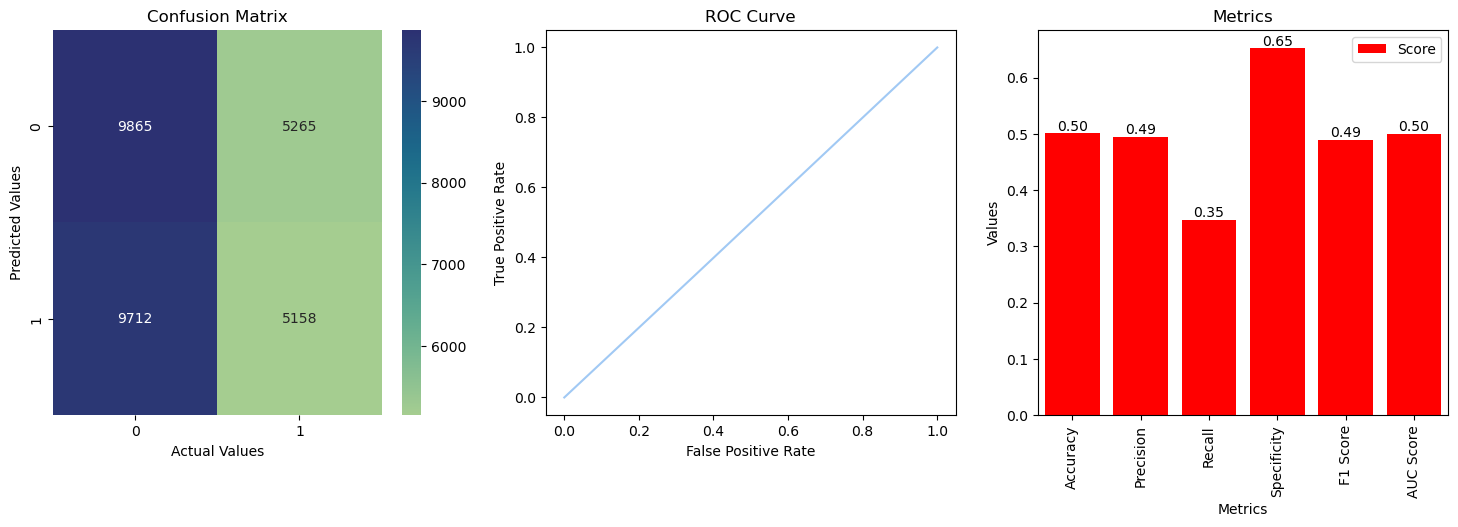

In [47]:
metrics_map(Y_test,preds,"GridSearch")

### Using XGBoost

In [48]:
!pip install xgboost

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier()

In [51]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
Y1_pred = xgb.predict(X_test)

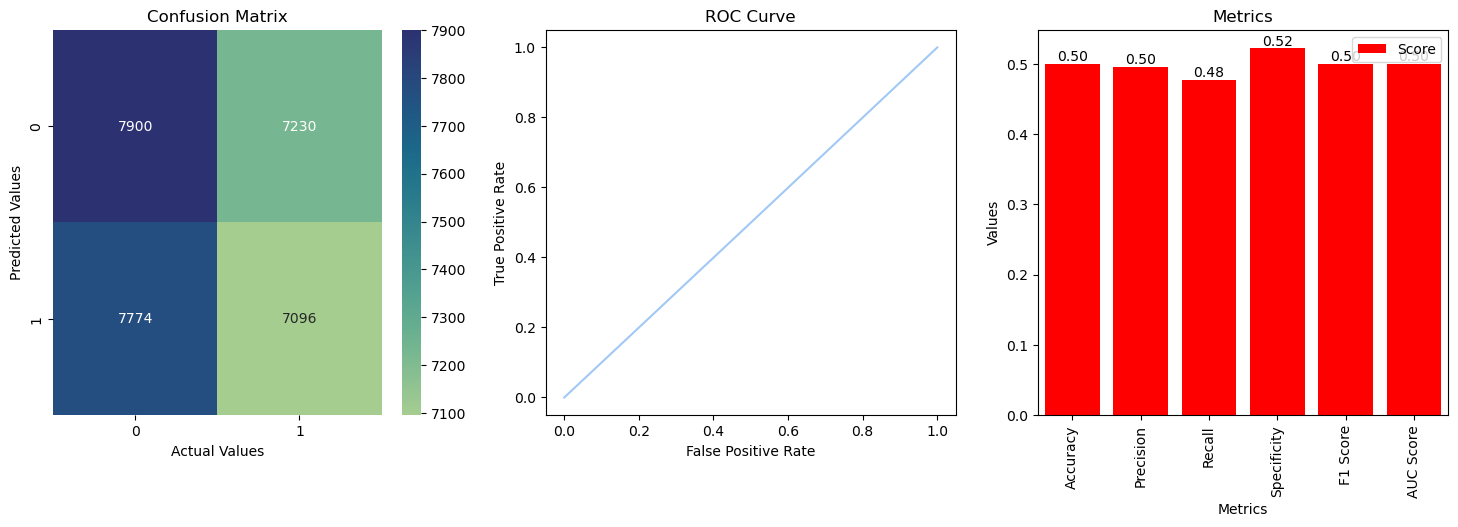

In [55]:
metrics_map(Y_test,Y1_pred,"GridSearch")

## Model Deployment

### Making a Pickle File

In [52]:
import pickle

In [53]:
pickle.dump(rfc,open("Model.pkl","wb"))